<a href="https://colab.research.google.com/github/aaeshaalarouki/GazaSkyGeeks/blob/main/RealEstate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

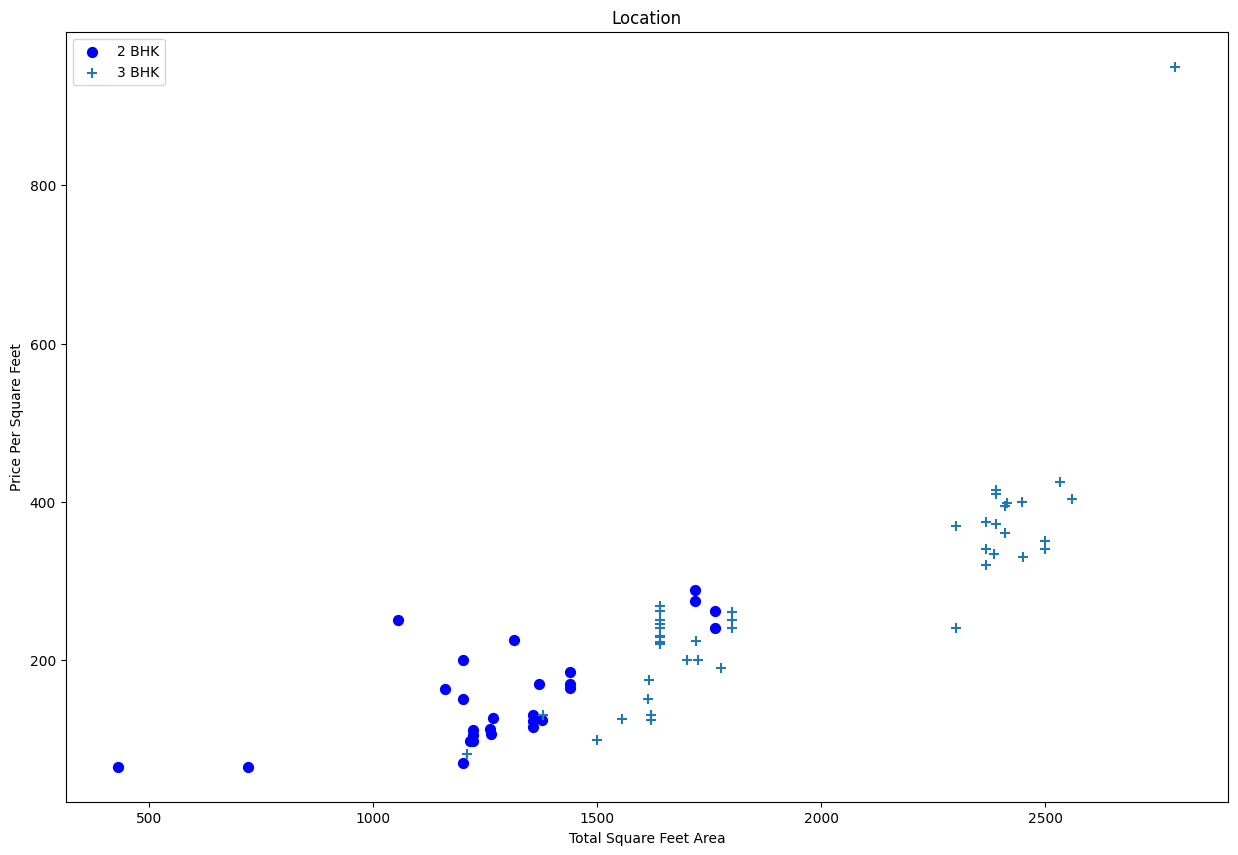

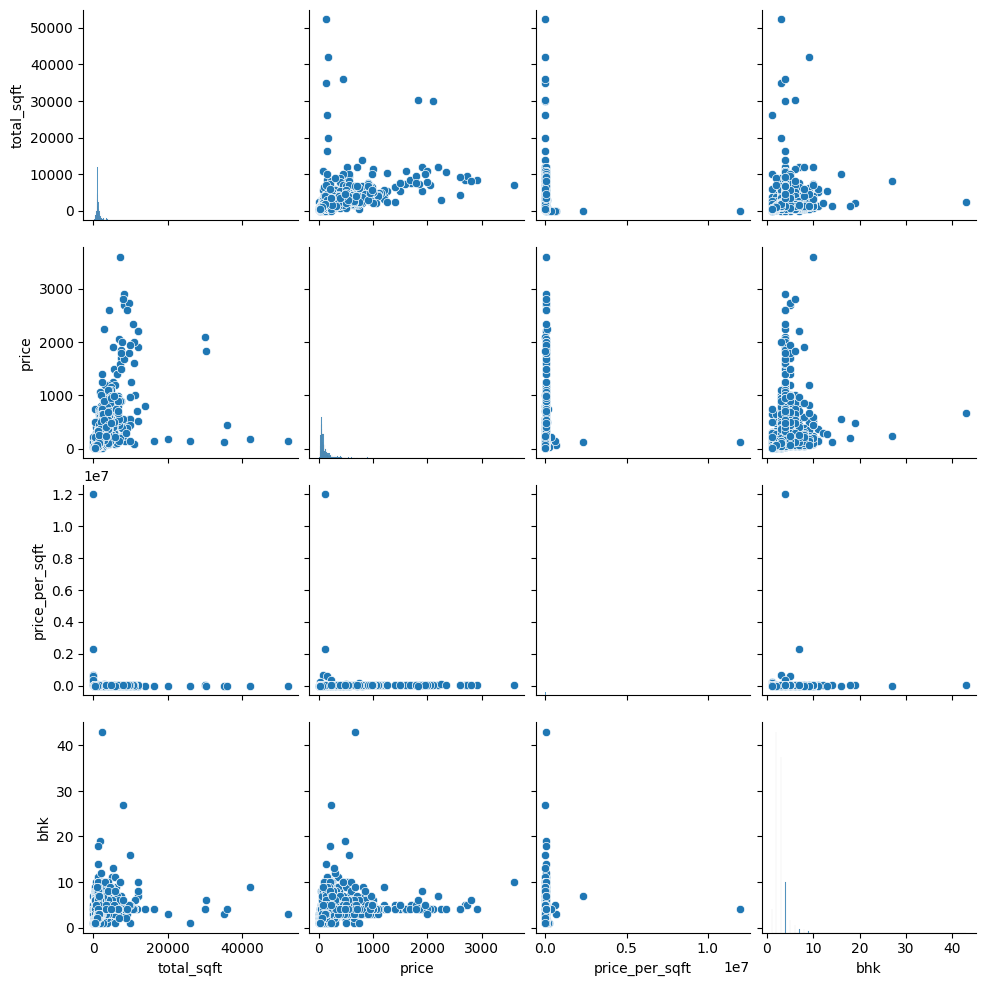

total_sqft        42
bhk                0
price_per_sqft    42
dtype: int64
total_sqft        4
bhk               0
price_per_sqft    4
dtype: int64
total_sqft        0
bhk               0
price_per_sqft    0
dtype: int64
total_sqft        0
bhk               0
price_per_sqft    0
dtype: int64
Mean Squared Error: 25518.957021954386
R2 Score: -0.9506619107198533


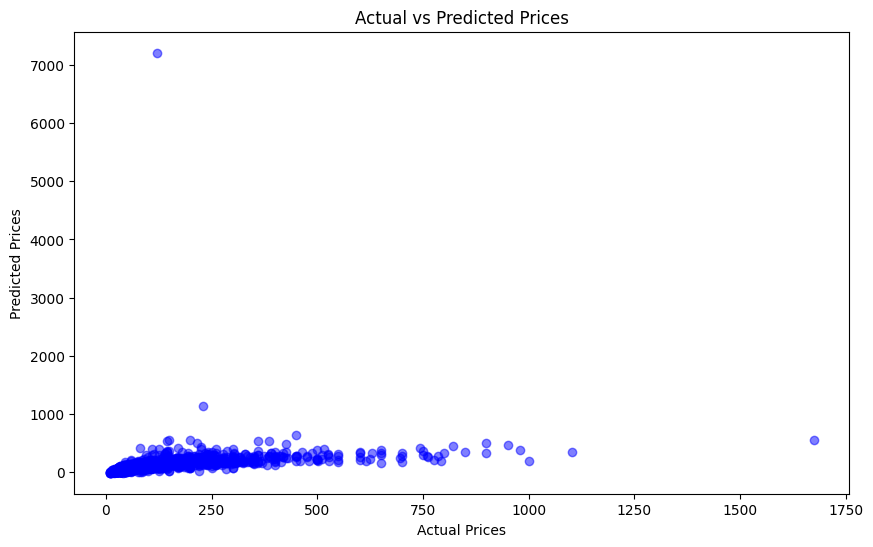

Text(0, 0.5, 'Count')

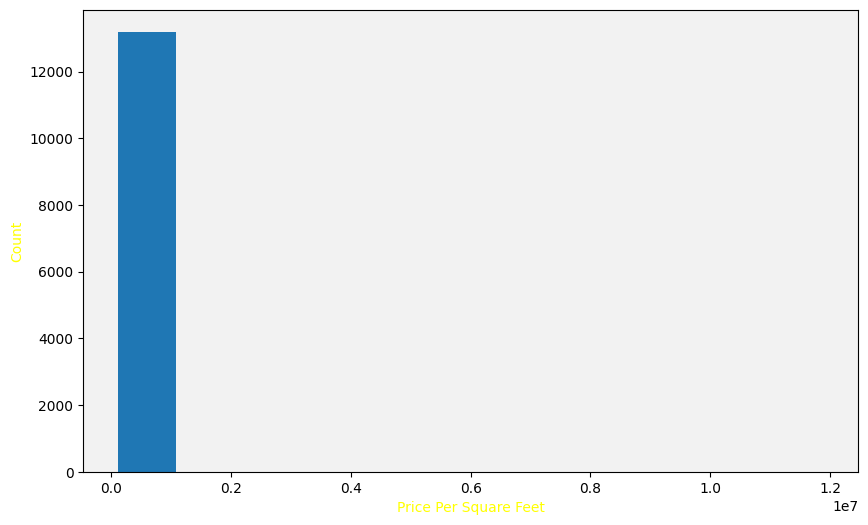

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

RE= pd.read_csv('https://github.com/aaeshaalarouki/GazaSkyGeeks')
RE.head(10)
#RE.tail()
RE.describe()
#RE.shape

RE2= RE.groupby('area_type')['area_type'].agg('count')
RE2.head()
RE2 = RE.drop (['area_type', 'society','balcony','availability'], axis = 'columns')
RE2.head()
RE2.isnull().sum()
RE3 = RE2.dropna()
RE3.isnull().sum()
RE3['size'].unique()


RE3['bhk'] = RE3['size'].apply(lambda x: int(x.split(' ')[0]))

RE3.head()

RE3[RE3.bhk>20]

RE3.total_sqft.unique()

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
RE3[~RE3['total_sqft'].apply(is_float)].head(10)

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
convert_sqft_to_num('2000 - 2850 ')
convert_sqft_to_num('4125Perch')

RE4  = RE3.copy()
RE4['total_sqft'] = RE4['total_sqft'].apply(convert_sqft_to_num)
RE4.head()

RE5= RE4.copy()
RE5.head()
RE5['price_per_sqft']  = RE5['price']*100000/RE5['total_sqft']#RE5.head()

RE5.location = RE5.location.apply(lambda x: x.strip())
location_stats = RE5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

def plot_scatter_chart(RE,location):
    bhk2 = RE[(RE.location==location) & (RE.bhk == 2)]
    bhk3 = RE[(RE.location==location) & (RE.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color ='blue', label ='2 BHK', s = 50)
    plt.scatter (bhk3.total_sqft,bhk3.price, marker= '+', label = '3 BHK' , s = 50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Location')
    plt.legend()


plot_scatter_chart(RE5, 'Rajaji Nagar')

columns_to_plot = ['total_sqft', 'price', 'price_per_sqft', 'bhk']
sns.pairplot(RE5[columns_to_plot])
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = RE5[['total_sqft', 'bhk', 'price_per_sqft']]
y = RE5['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
print(X_train.isnull().sum())
print(X_test.isnull().sum())
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print(X_train.isnull().sum())
print(X_test.isnull().sum())
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


matplotlib.rcParams['figure.figsize'] = (10,6)

plt.hist(RE5.price_per_sqft,rwidth = 0.8)
plt.gca().set_facecolor('#f2f2f2')
plt.xlabel('Price Per Square Feet', color='Yellow')
plt.ylabel('Count', color='Yellow')
